# EfficientNet


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Pre Processing

In [2]:
import numpy as np
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('/content/drive/MyDrive/Data/images_original')

print (dataset_path)

print("Types of classes labels found: ", len(dataset_path))

['hiphop', 'pop', 'blues', 'metal', 'classical', 'reggae', 'rock', 'disco', 'jazz', 'country']
Types of classes labels found:  10


In [3]:
class_labels = []

for item in dataset_path:

    all_classes = os.listdir('/content/drive/MyDrive/Data/images_original' + '/' +item)



    for room in all_classes:
        class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))


In [4]:

df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

   Labels                                image
0  hiphop  dataset_path/hiphop/hiphop00003.png
1  hiphop  dataset_path/hiphop/hiphop00006.png
2  hiphop  dataset_path/hiphop/hiphop00011.png
3  hiphop  dataset_path/hiphop/hiphop00008.png
4  hiphop  dataset_path/hiphop/hiphop00009.png
      Labels                                  image
994  country  dataset_path/country/country00081.png
995  country  dataset_path/country/country00052.png
996  country  dataset_path/country/country00057.png
997  country  dataset_path/country/country00051.png
998  country  dataset_path/country/country00080.png


In [5]:
df.shape

(999, 2)

In [6]:
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  999
Labels
hiphop       100
pop          100
blues        100
metal        100
classical    100
reggae       100
rock         100
disco        100
country      100
jazz          99
Name: count, dtype: int64


In [7]:
import cv2
path = '/content/drive/MyDrive/Data/images_original/'
dataset_path = os.listdir('/content/drive/MyDrive/Data/images_original')

im_size = 224
#im_size = 300 (replace the above line for B3 model)


images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)
    filenames = [i for i in os.listdir(data_path) ]

    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [8]:
images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(999, 224, 224, 3)

In [9]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print(y.shape)
print (y)


['hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop'
 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop'
 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop'
 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop'
 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop'
 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop'
 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop'
 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop'
 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop'
 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop'
 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop'
 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop'
 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop'
 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'p

In [13]:
p = np.empty(shape=(999,10))
for i,e in enumerate(y):
    a=np.zeros(10)
    a[e]=1
    p[i] = a

print(p)
Y=p
print(Y[5])
print(Y[35:])
print(Y[110])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [14]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.4, random_state=415)

#train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.2, random_state=415) (replace the above line for 80/20)


print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

print(train_x[1])

(599, 224, 224, 3)
(599, 10)
(400, 224, 224, 3)
(400, 10)
[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]



# EfficientNet Implementation :



In [10]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

NUM_CLASSES = 10
IMG_SIZE = 224
#IMG_SIZE = 300 (replace the above line for B3 model)

size = (IMG_SIZE, IMG_SIZE)


inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))


outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

In [15]:
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"] )

#model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] ) (replace the above line for 'adam' optimizer)

model.summary()

hist = model.fit(train_x, train_y, epochs=30, verbose=2)


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, 10)                4062381   
 )                                                               
                                                                 
Total params: 4062381 (15.50 MB)
Trainable params: 4020358 (15.34 MB)
Non-trainable params: 42023 (164.16 KB)
_________________________________________________________________
Epoch 1/30
19/19 - 30s - loss: 2.9226 - accuracy: 0.1452 - 30s/epoch - 2s/step
Epoch 2/30
19/19 - 5s - loss: 2.6172 - accuracy: 0.1836 - 5s/epoch - 241ms/step
Epoch 3/30
19/19 - 5s - loss: 2.6033 - accuracy: 0.2104 - 5s/epoch - 240ms/step
Epoch 4/30
19/19 - 5s - loss: 2.4793 - accuracy: 0.2037 - 5s/epoch - 244ms/step
Epoch 5/30
19/19 - 5s - lo

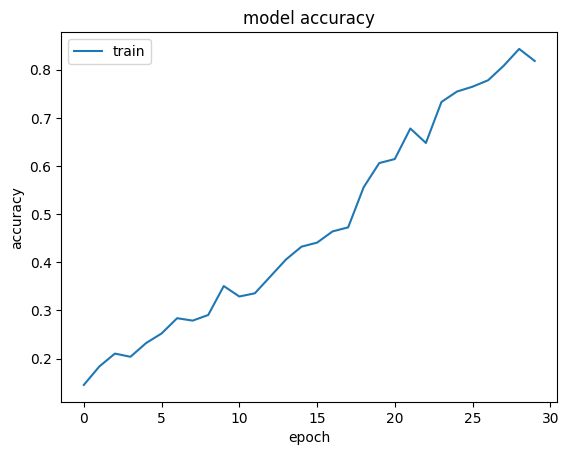

In [16]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

In [17]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

13/13 [==============================] - 6s 149ms/step - loss: 18.5531 - accuracy: 0.0775
Loss = 18.553077697753906
Test Accuracy = 0.07750000059604645


In [ ]:
model.save('/content/drive/MyDrive/model02.h5')

# Testing Efficient Model On single data (optional)

Input image shape: (1, 224, 224, 3)


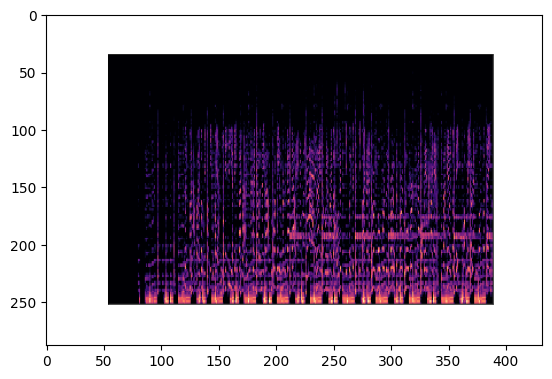

In [18]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input


img_path = '/content/drive/MyDrive/Data/hiphop00038.png'


img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [19]:
preds=model.predict(x)
preds

1/1 [==============================] - 3s 3s/step


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)